In [12]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./RNAseq_result.xlsx')

In [3]:
df.head()

,target_id,WT1,WT2,WT3,Treat1,Treat2,Treat3,Treat4,Treat5,Treat6
0,ENSMUST00000177564.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENSMUST00000196221.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUST00000179664.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSMUST00000178537.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENSMUST00000178862.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# WT,TREAT matrix 만들기

matrix = df.values[:,1:]

In [15]:
# matrix => zscore 로 변환 
from sklearn.preprocessing import scale
zscores = scale(matrix,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


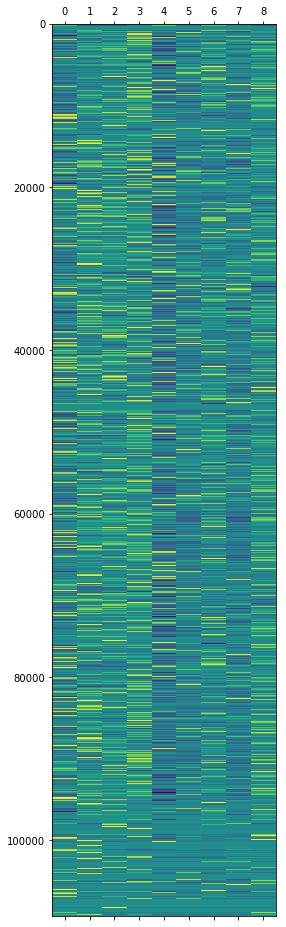

In [16]:
plt.matshow(zscores,aspect='auto')

In [26]:
wt_mean = np.mean(zscores[:,0:3],axis=1)
wt_std  = np.std(zscores[:,0:3],axis=1)

In [27]:
treat_mean = np.mean(zscores[:,3:9],axis=1)
treat_std  = np.std(zscores[:,3:9],axis=1)

In [28]:
stable_expression_wt = wt_std < 0.5
stable_expression_treat = treat_std < 0.5

In [20]:
diff = wt_mean - treat_mean

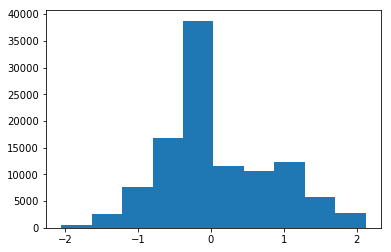

In [21]:
plt.hist(diff)
plt.show()

In [22]:
wt_high_than_treat = diff > 1
treat_high_than_wt = diff < -1

In [41]:
m = np.array([True,False,True,False,False])

In [57]:
m.nonzero()[0]

array([0, 2], dtype=int64)

In [45]:
set1 = wt_high_than_treat&stable_expression_treat&stable_expression_wt
set2 = treat_high_than_wt&stable_expression_treat&stable_expression_wt

In [61]:
set_all = list(set1.nonzero()[0]) + list(set2.nonzero()[0])

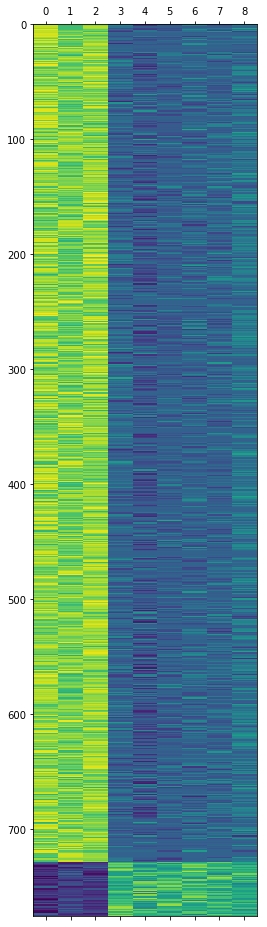

In [62]:
plt.matshow(zscores[set_all],aspect='auto')
plt.show()

In [64]:
mrnas = df['target_id'].values

In [69]:
mrnas[set_all]

array(['ENSMUST00000188251.6', 'ENSMUST00000183291.1',
       'ENSMUST00000103205.10', 'ENSMUST00000166505.6',
       'ENSMUST00000033009.15', 'ENSMUST00000108045.2',
       'ENSMUST00000024811.7', 'ENSMUST00000053286.8',
       'ENSMUST00000209422.1', 'ENSMUST00000210901.1',
       'ENSMUST00000038423.5', 'ENSMUST00000018841.2',
       'ENSMUST00000078090.11', 'ENSMUST00000173167.7',
       'ENSMUST00000028755.7', 'ENSMUST00000053686.8',
       'ENSMUST00000031549.5', 'ENSMUST00000057557.13',
       'ENSMUST00000023207.14', 'ENSMUST00000106023.7',
       'ENSMUST00000026571.10', 'ENSMUST00000097952.8',
       'ENSMUST00000028259.11', 'ENSMUST00000112459.3',
       'ENSMUST00000175964.1', 'ENSMUST00000218218.1',
       'ENSMUST00000119591.1', 'ENSMUST00000065889.9',
       'ENSMUST00000113617.2', 'ENSMUST00000028995.4',
       'ENSMUST00000030841.9', 'ENSMUST00000029574.12',
       'ENSMUST00000099498.8', 'ENSMUST00000040110.7',
       'ENSMUST00000164613.7', 'ENSMUST00000112586.7',
  

In [70]:
df_annot = pd.read_csv('./mouse_genes_GRCm38.p5_transcript_version.txt',sep='\t')

In [73]:
df_annot_ix = df_annot.set_index('Transcript stable ID version')

In [78]:
mrnas[set_all]

array(['ENSMUST00000188251.6', 'ENSMUST00000183291.1',
       'ENSMUST00000103205.10', 'ENSMUST00000166505.6',
       'ENSMUST00000033009.15', 'ENSMUST00000108045.2',
       'ENSMUST00000024811.7', 'ENSMUST00000053286.8',
       'ENSMUST00000209422.1', 'ENSMUST00000210901.1',
       'ENSMUST00000038423.5', 'ENSMUST00000018841.2',
       'ENSMUST00000078090.11', 'ENSMUST00000173167.7',
       'ENSMUST00000028755.7', 'ENSMUST00000053686.8',
       'ENSMUST00000031549.5', 'ENSMUST00000057557.13',
       'ENSMUST00000023207.14', 'ENSMUST00000106023.7',
       'ENSMUST00000026571.10', 'ENSMUST00000097952.8',
       'ENSMUST00000028259.11', 'ENSMUST00000112459.3',
       'ENSMUST00000175964.1', 'ENSMUST00000218218.1',
       'ENSMUST00000119591.1', 'ENSMUST00000065889.9',
       'ENSMUST00000113617.2', 'ENSMUST00000028995.4',
       'ENSMUST00000030841.9', 'ENSMUST00000029574.12',
       'ENSMUST00000099498.8', 'ENSMUST00000040110.7',
       'ENSMUST00000164613.7', 'ENSMUST00000112586.7',
  

In [82]:
df_annot_ix.loc[mrnas[set2]].head()

,Gene stable ID,Transcript stable ID,Gene name,Gene description
Transcript stable ID version,,,,
ENSMUST00000140287.7,ENSMUSG00000033021,ENSMUST00000140287,Gmppa,GDP-mannose pyrophosphorylase A [Source:MGI Sy...
ENSMUST00000208216.1,ENSMUSG00000109293,ENSMUST00000208216,Dcst2,DC-STAMP domain containing 2 [Source:MGI Symbo...
ENSMUST00000023687.7,ENSMUSG00000022965,ENSMUST00000023687,Ifngr2,interferon gamma receptor 2 [Source:MGI Symbol...
ENSMUST00000140012.7,ENSMUSG00000050751,ENSMUST00000140012,Pgbd5,piggyBac transposable element derived 5 [Sourc...
ENSMUST00000189925.6,ENSMUSG00000025949,ENSMUST00000189925,Pikfyve,"phosphoinositide kinase, FYVE type zinc finger..."


# heatmap

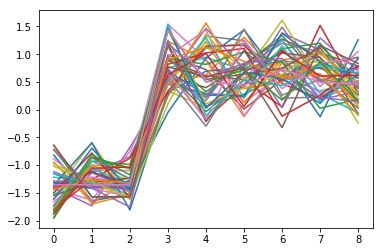

In [85]:
plt.plot(zscores[set2].T)
plt.show()

In [92]:
df_annot_ix.loc[mrnas[set2]]['Gene name'].values

array(['Gmppa', 'Dcst2', 'Ifngr2', 'Pgbd5', 'Pikfyve', 'Slc25a37',
       'Tmem120a', '4930533O14Rik', 'Tubb4a', 'Mlana', 'Armc7', 'Rnh1',
       'Fchsd2', '5031439G07Rik', 'Fam213a', 'Rapgef3', 'Nsmf', 'Dad1',
       'Capn10', 'Mapk8ip1', 'Dnmt3b', 'Syngr1', 'Fhdc1', 'Nyap1', 'Patj',
       'Mical3', 'Agpat3', 'Tyr', 'Stx7', 'Msi1', 'Cd48', 'Dbnl', 'Zfp691',
       'Atp6v0c', 'Gimap9', 'Rab3gap1', 'Bcl2l1', 'Pdk2', 'Naif1',
       'Slc45a2', 'Npc2', 'Dusp2', 'Atp6v0b', 'Hsf4', 'Otos', 'Traf3ip3',
       'Faf2'], dtype=object)